### Windfarm Notebook

***

 The weather data that we are analysing was downloaded from the Met Eireann website. We have downloaded data from the four corners of the country to see if there is a variation in wind speed based on location. We will analyse the data and see if the wind speed for Ireland is changing over time. Is Ireland getting windier, less windier?


<div><img src="https://d3hnfqimznafg0.cloudfront.net/image-handler/ts/20180403085507/ri/850/src/images/Article_Images/ImageForArticle_703(1).jpg" alt="Domain Names", width=640, height=360"></div>


 ### Description of Project

***

### **Tasks** 

1.  You may look for your own source of historic weather information, and/or
    use the Met Eireann one (Historical Data - Met Éireann - The Irish
    Meteorological Service). Click on the download button to get a zip file that
    contains a CSV file.
1.  You may need to clean and normalize the data before doing analysis

**Questions you can ask:**

1.  How much wind power is there at a particular location? This is quite open ended, is this just the mean wind speed for
    an hour/day/month/year, or should you take into account that there are wind ranges that the windfarms can operate in. (min
    max speeds)

1.  Some analysis of what power when would be useful (time of day/year)

1.  Are the wind speeds likely to be the same in 10 years in the future? ie is there a trend in recorded wind speeds over the last
    few decades.

1.  Is there any other weather metric worth analyzing (eg rain, temp)

1.  What will the power output of the windfarms in Ireland be like next week, according to the weather forecasts? (ok that is a
    tricky one,because you would need to get, or make up, information about the size and locations of the wind farms in Ireland, 
    or find/makeup the windspeed to power output equation.

1.  Anything else you can think of?


### Import the Libraries

***

We use [pandas](https://pandas.pydata.org/) for the DataFrame data structure. It allows us to investigate CSV files, amongst other 
features. 
Pandas is a software library written for the Python programming language, which is used for data manipulation and analysis.

We use [NumPy](https://numpy.org/), which is a library for the Python programming language, which allows us to work with large 
multi-dimensional arrays and matrices. It also supplies a large collection of high-level mathematical functions to operate on these 
arrays. 
[NumPy Wikipedia](https://en.wikipedia.org/wiki/NumPy)

We use [matplotlib](https://matplotlib.org/), which is a plotting library for the Python programming language, and is usually used in 
conjunction with its numerical mathematics extension NumPy.


In [15]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from python.createdb import CreateDB as createdb
from python.createtable import CreateTable as createtable
from python.stations import Stations as stations
from python.import_data import Import_Data as import_data
from python.import_daily import ImportDaily as import_daily
from python.writedb import WriteDB as write
from python.testdb import TestDB as testdb
from python.join import Join as join

### Import the weather information for a number of weather stations.
***

Below, we will look at importing the weather data from a number of different locations around the country. We will created python classes to import the datasets into the `data folder` in this repository, and also to import the data to an SQL database called `weather`. We will create tables in the database with the location name of each station that we select for downloading the data from. For example `shannon_airport`, `dublin_airport` etc.


In [16]:

# List of weather stations and the number of rows to skip in the data file
weather_stations = [
     [{"athenry" :1875}, 17, 24],
     [{"cork_airport" : 3904}, 23, 25],
     [{"shannon_airport" : 518}, 23, 25],
     [{"dublin_airport" : 532}, 23, 26],
     [{"mullingar": 875}, 17, 24],
     [{"gurteen" : 1475}, 17, 24]
]

# Create the database to store the downloaded data
'''
db = createdb()

#Create an instance of the CreateTable class to create the tables in the database
tables = createtable()

# Create the tables in the database
for i in weather_stations:
    for name, id in i[0].items():
       skiprows = i[1]
       tables.create_table(name, skiprows)

# Create an instatnce of the import data class to import the data into the data folder
# Folder has being created so commenting out to stop it being rerun again and again


data = import_data()

#Import the data from the weather stations
for i in weather_stations:
    for name, id in i[0].items():
        skiprows = i[1]
        data.import_data(name, id, skiprows)

data2 = import_daily()

#Import the data from the weather stations
for i in weather_stations:
    for name, id in i[0].items():
        skiprows = i[2]
        data2.import_data(name, id, skiprows)

#Create an instance of the write class to write the data to a database 
#As above database has being created so commenting out to stop it being rerun again and again
#(Takes 4 minutes to load data to sql database)

write = write()

# Write the data to the database using the station name as the table name
for i in weather_stations:
    for name, id in i[0].items():
        skiprows = i[1]
        write.write_db(name, id , skiprows)
'''


'\ndb = createdb()\n\n#Create an instance of the CreateTable class to create the tables in the database\ntables = createtable()\n\n# Create the tables in the database\nfor i in weather_stations:\n    for name, id in i[0].items():\n       skiprows = i[1]\n       tables.create_table(name, skiprows)\n\n# Create an instatnce of the import data class to import the data into the data folder\n# Folder has being created so commenting out to stop it being rerun again and again\n\n\ndata = import_data()\n\n#Import the data from the weather stations\nfor i in weather_stations:\n    for name, id in i[0].items():\n        skiprows = i[1]\n        data.import_data(name, id, skiprows)\n\ndata2 = import_daily()\n\n#Import the data from the weather stations\nfor i in weather_stations:\n    for name, id in i[0].items():\n        skiprows = i[2]\n        data2.import_data(name, id, skiprows)\n\n#Create an instance of the write class to write the data to a database \n#As above database has being created s

In [17]:
#Test the database by querying the data
test = testdb()

#Test the database by querying the data. Print the first 20 rows of the table
test.test_db('cork_airport')

('01-jan-1962 01:00', 8, None, 0, -1.1, 0, -1.3, -1.6, 5.3, 94.0, 1016.0, 1, 14, 1, 340, 2, 0, None, 30000.0, 999.0, 2.0)
('01-jan-1962 02:00', 8, None, 0, -1.1, 0, -1.3, -1.6, 5.3, 94.0, 1016.5, 1, 10, 1, 340, 3, 1, None, 30000.0, 20.0, 7.0)
('01-jan-1962 03:00', 8, None, 0, -1.0, 0, -1.2, -1.6, 5.3, 94.0, 1016.7, 1, 12, 1, 320, 1, 1, None, 30000.0, 999.0, 3.0)
('01-jan-1962 04:00', 8, None, 0, -1.6, 0, -1.8, -2.2, 5.1, 94.0, 1017.2, 1, 8, 1, 330, 1, 0, None, 30000.0, 999.0, 1.0)
('01-jan-1962 05:00', 8, None, 0, -2.1, 0, -2.3, -3.3, 4.8, 93.0, 1018.0, 1, 11, 1, 320, 1, 0, None, 30000.0, 999.0, 0.0)
('01-jan-1962 06:00', 8, None, 0, -2.1, 0, -2.3, -3.3, 4.9, 93.0, 1018.1, 1, 11, 1, 330, 2, 1, None, 30000.0, 999.0, 0.0)
('01-jan-1962 07:00', 8, None, 0, -2.2, 0, -2.4, -3.3, 4.8, 93.0, 1018.8, 1, 11, 1, 340, 2, 0, None, 30000.0, 999.0, 0.0)
('01-jan-1962 08:00', 8, None, 0, -1.6, 0, -1.9, -2.7, 4.9, 92.0, 1019.0, 1, 14, 1, 340, 2, 0, None, 30000.0, 999.0, 0.0)
('01-jan-1962 09:00', 8, N

### Load the datasets

***

Since it would be useful to analyse windspeed from the four corners of the country I have downloaded multiple datasets from the Met Eireann website into the `data` folder of this repository above. The datasets were not identical, in so far as they contain a different number of columns depending upon the location they were taken from. Some datasets contained 17 rows metadata, while others contained 23 rows metadata. Some stations have 15 columns data, while other stations have 21 columns data. Therefore the first 17 rows of some of the datasets, and the first 23 rows of other datasets contained `metadata`, and it was important to skip these rows when importing the dataset from the `Met Eireann` website.  When importing the datasets the `skiprows` argument was passed to the `pd.read_csv()` function
to skip the metadata contained in the first number of rows. I have used the metadata in these first rows to rename the columns of the 
dataset. This makes the datset clearer and easier to read. The `skipinitialspace=True` argument was used while importing the dataset, and 
the reasoning for this is explained below when we are looking at the missing values in the dataset.

Now its time to move on and clean the datasets. I have demonstrated the steps taken to clean the dataset for the `dublin_airport_532.csv` file in the next section of this notebook. I have created a class in the python folder of this repository which will carry out the following steps on all the other imported datasets also. 

First step, we want to drop the combine all the datasets into one, and while we are doing this we will just create a dataset with the columns of interest to us.

In [18]:
weather_data_columns =[ 'Date/Time (utc)', 'Maximum Air Temperature (C)',  'Minimum  Air Temperature (C)', 'Precipitation Amount (mm)', 'Mean Wind Speed (knot)', 'Highest ten minute mean wind speed (knot)', 'Wind Direction at max 10 min. mean (deg)', 'Highest Gust (knot)', ]


In [19]:
#Lets try joining the dataset together

#Import the class to join our dataset
join = join()

#Join the dataset together
join.join_data(weather_data_columns)

data/daily_data\athenry_1875.csv
athenry
data/daily_data\cork_airport_3904.csv
cork
data/daily_data\dublin_airport_532.csv
dublin
data/daily_data\gurteen_1475.csv
gurteen
data/daily_data\mullingar_875.csv
mullingar
data/daily_data\shannon_airport_518.csv
shannon


In [20]:
#Now lets load the dataset into a pandas dataframe

df = pd.read_csv('data/joined_data.csv')

#View the rows between 10 and 20
df.tail(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112394 entries, 0 to 112393
Data columns (total 9 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Date/Time (utc)                            112394 non-null  object 
 1   Maximum Air Temperature (C)                112394 non-null  float64
 2   Minimum  Air Temperature (C)               110815 non-null  float64
 3   Precipitation Amount (mm)                  112298 non-null  float64
 4   Mean Wind Speed (knot)                     112380 non-null  float64
 5   Highest ten minute mean wind speed (knot)  111486 non-null  float64
 6   Wind Direction at max 10 min. mean (deg)   111474 non-null  float64
 7   Highest Gust (knot)                        111488 non-null  float64
 8   station_name                               112394 non-null  object 
dtypes: float64(7), object(2)
memory usage: 7.7+ MB


In [21]:
#Check for missing values

missing_values =df.isna().sum()

print(missing_values)


Date/Time (utc)                                 0
Maximum Air Temperature (C)                     0
Minimum  Air Temperature (C)                 1579
Precipitation Amount (mm)                      96
Mean Wind Speed (knot)                         14
Highest ten minute mean wind speed (knot)     908
Wind Direction at max 10 min. mean (deg)      920
Highest Gust (knot)                           906
station_name                                    0
dtype: int64


In [22]:
 #Drop the rows with missing values
df.dropna(inplace=True)

#Check for missing values again
missing_values =df.isna().sum()

print(missing_values)


Date/Time (utc)                              0
Maximum Air Temperature (C)                  0
Minimum  Air Temperature (C)                 0
Precipitation Amount (mm)                    0
Mean Wind Speed (knot)                       0
Highest ten minute mean wind speed (knot)    0
Wind Direction at max 10 min. mean (deg)     0
Highest Gust (knot)                          0
station_name                                 0
dtype: int64


In [23]:
#As we will be analysing the data by month, we need to convert the 'Date/Time (utc)' column to a datetime 

df['Date/Time (utc)'] = pd.to_datetime(df['Date/Time (utc)'], format='%d-%b-%Y')
print(df['Date/Time (utc)' ])

#Extract the month from the 'Date/Time (utc)' column
df['Month'] = df['Date/Time (utc)'].dt.month

#Extract the year from the 'Date/Time (utc)' column
df['Year'] = df['Date/Time (utc)'].dt.year


df.head()


853      2012-06-28
854      2012-06-29
855      2012-06-30
856      2012-07-01
857      2012-07-02
            ...    
112389   2024-11-26
112390   2024-11-27
112391   2024-11-28
112392   2024-11-29
112393   2024-11-30
Name: Date/Time (utc), Length: 109891, dtype: datetime64[ns]


,Date/Time (utc),Maximum Air Temperature (C),Minimum Air Temperature (C),Precipitation Amount (mm),Mean Wind Speed (knot),Highest ten minute mean wind speed (knot),Wind Direction at max 10 min. mean (deg),Highest Gust (knot),station_name,Month,Year
853,2012-06-28,17.9,13.3,20.0,6.7,13.0,250.0,20.0,athenry,6,2012
854,2012-06-29,16.1,8.9,2.9,9.9,18.0,220.0,26.0,athenry,6,2012
855,2012-06-30,14.6,10.2,4.1,8.5,17.0,260.0,26.0,athenry,6,2012
856,2012-07-01,14.5,7.9,4.8,6.8,10.0,220.0,16.0,athenry,7,2012
857,2012-07-02,18.3,13.0,4.6,6.0,12.0,230.0,18.0,athenry,7,2012


So, what columns are we interested in analysing. Obviously we need to analyse the wind speed column. Will temperature, wind-direction, precipitaion amount etc have any effect on the windspeed. Lets have a quick loot at the correlation between the variables in the dataset, is something standing out?

In [24]:

#Drop columns that are not needed for correlation analysis
correlation_df = df.drop(columns=['Date/Time (utc)', 'station_name', 'Month', 'Year'])

#Correlate the data to see if there are any relationships between the variables
correlation = correlation_df.corr()


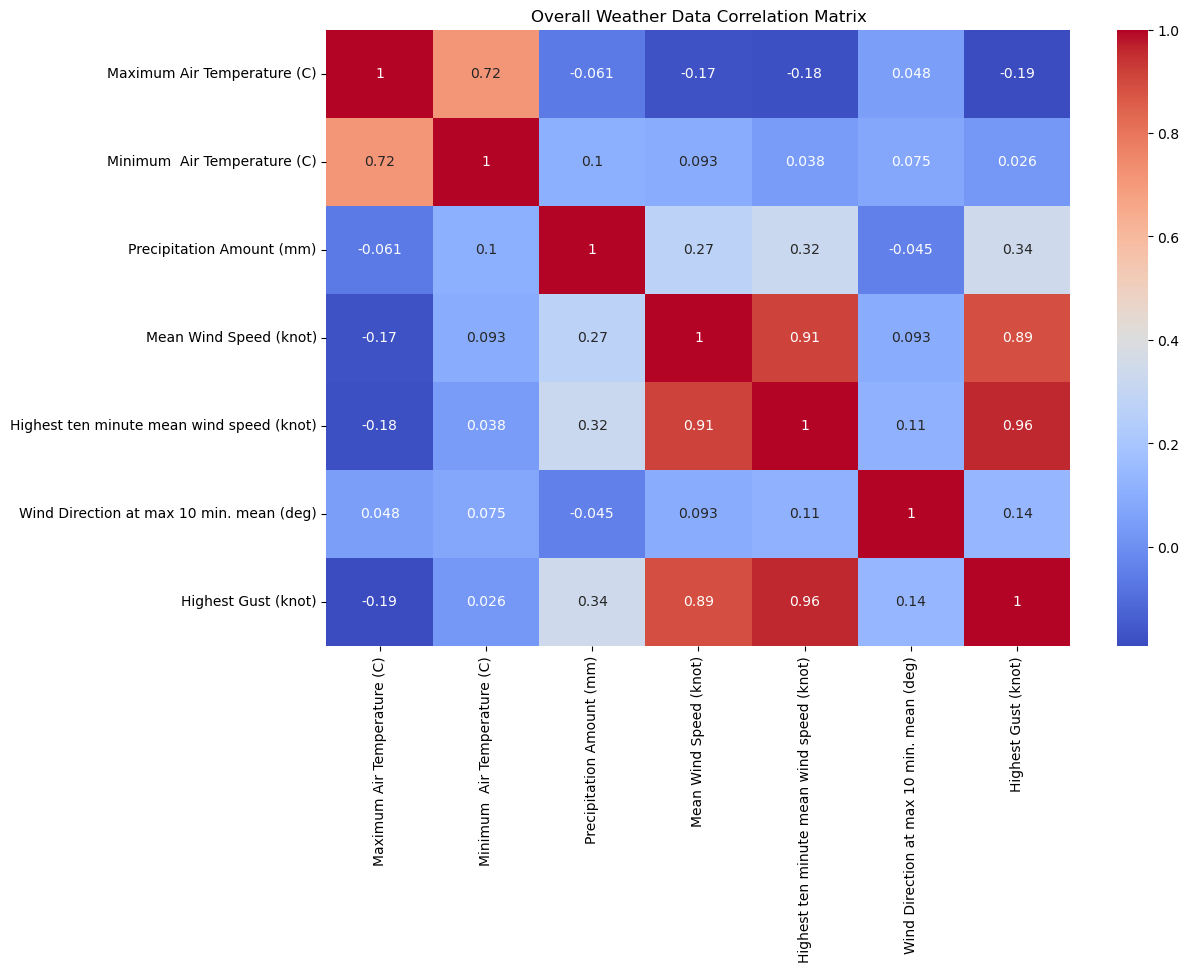

In [25]:
#Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Overall Weather Data Correlation Matrix')
plt.show()

